## `doralite` API Examples

Here are some examples for using the light-weight API for interacting with the Dora website in a Jupyter notebook

In [1]:
%matplotlib inline

import doralite
import pandas as pd
import seaborn as sns
import subprocess
import xarray as xr

### Search Dora for Experiments

Using the string 'OM4p125', we can search Dora for all matching experiments:

In [2]:
doralite.search('OM4p125')

* 1085 /archive/ogrp/CMIP6/OMIP/warsaw_201803_mom6_2018.04.11/OM4p125_IAF_csf_JRA55do1-3_cycle1/gfdl.ncrc4-intel16-prod/pp
* 1086 /archive/ogrp/CMIP6/OMIP/warsaw_201803_mom6_2018.04.11/OM4p125_IAF_csf/gfdl.ncrc4-intel16-prod/pp
* 1087 /archive/ogrp/testing_20180703_mom6_2018.04.11/OM4p125_NYF_baseline/gfdl.ncrc4-intel16-prod/pp
* 1100 /archive/oar.gfdl.ogrp-account/CMIP6/OMIP/warsaw_201803_mom6_2018.04.11/OM4p125_IAF_csf_JRA55do1-3_r2_cycle1/gfdl.ncrc4-intel16-prod/pp
* 1116 /archive/oar.gfdl.ogrp-account/CMIP6/OMIP/warsaw_201803_mom6_2018.04.11/OM4p125_IAF_csf_JRA55do1-3_OcnAlbOpt5_cycle1/gfdl.ncrc4-intel16-prod/pp
* 1151 /archive/oar.gfdl.ogrp-account/CMIP6/OMIP/warsaw_201803_mom6_2018.04.11/OM4p125_IAF_csf_JRA55do1-3_r2_cycle2/gfdl.ncrc4-intel16-prod/pp
* 1163 /archive/oar.gfdl.ogrp-account/CMIP6/OMIP/xanadu_mom6_20181101/OM4p125_IAF_csf_JRA55do1-3_r4_cycle1/gfdl.ncrc4-intel16f2-prod/pp
* 1164 /archive/oar.gfdl.ogrp-account/CMIP6/OMIP/xanadu_mom6_20181101/OM4p125_IAF_csf_CORE2_r4/gf

### Obtain Metadata for an Experiment

Once we know the id number for an experiment, the API can return a dictionary with the metadata associated with that experiment.

In [3]:
metadata = doralite.dora_metadata(1433)
for k in sorted(metadata.keys()):
    print(f'{k}: {metadata[k]}')

displayName: None
expLabels: c192_omp125_prototype,2010climo,engineering_run
expLength: 10
expMIP: None
expName: CM4_2010Control_C_noBLING_c192_OM4p125
expType: 2kControl
id: 1433
label: CM4_2010Control_C_noBLING_c192_OM4p125
modelType: CM4
pathAnalysis: /nbhome/Niki.Zadeh/xanadu_esm4_20190304_devgfdl_20200330/CM4_2010Control_C_noBLING_c192_OM4p125/
pathDB: /gfdlhome/Niki.Zadeh/xanadu_esm4_20190304_devgfdl_20200330/CM4_2010Control_C_noBLING_c192_OM4p125/gfdl.ncrc4-intel18-prod-openmp/db/
pathHistory: /archive/Niki.Zadeh/xanadu_esm4_20190304_devgfdl_20200330/CM4_2010Control_C_noBLING_c192_OM4p125/gfdl.ncrc4-intel18-prod-openmp/history/
pathLog: None
pathPP: /archive/Niki.Zadeh/xanadu_esm4_20190304_devgfdl_20200330/CM4_2010Control_C_noBLING_c192_OM4p125/gfdl.ncrc4-intel18-prod-openmp/pp/
pathScript: /lustre/f2/dev/Niki.Zadeh/xanadu_esm4_20190304_devgfdl_20200330/CM4_2010Control_C_noBLING_c192_OM4p125/ncrc4.intel18-prod-openmp/scripts/
pathXML: /home/Niki.Zadeh/ncrc/xmls/xanadu/mdt_xml_RT

### Obtaining Global Mean Data as a DataFrame

The API can return a Pandas DataFrame for a given experiment id.  The dataframe can then be plotted, analyzed, and exported to a NumPy array

In [4]:
df = doralite.global_mean_data(1433,'globalAveOcean')
df.head()

,ave_rsntds,ave_evs,precip_ga,ave_rlntds,ave_hfds,tosga,ave_hfsso,soga,net_heat_coupler_ga,thetaoga,volo,sosga,LwLatSens_ga,ave_wfo,ave_hflso,ssh_ga,masso
date,,,,,,,,,,,,,,,,,
0001-07-01 12:00:00,175.462369,-0.000042,0.000037,-54.813927,0.112207,18.216041,-15.138810,34.720440,0.560376,3.586401,1.332220e+18,34.700939,-174.901993,-3.237439e-06,-104.949255,-0.075355,1.378851e+21
0002-07-01 12:00:00,173.544249,-0.000041,0.000038,-53.372849,0.447671,18.291863,-15.169945,34.720913,0.744834,3.588662,1.332202e+18,34.679731,-172.799414,-8.703284e-07,-104.256620,-0.126596,1.378831e+21
0003-07-01 12:00:00,174.246146,-0.000042,0.000038,-53.610644,0.698864,18.371185,-15.230234,34.721097,0.987850,3.589894,1.332195e+18,34.667507,-173.258295,-5.561459e-07,-104.417417,-0.146196,1.378824e+21
0004-07-01 12:00:00,173.970580,-0.000042,0.000038,-53.518149,0.651254,18.422346,-14.902846,34.721154,0.925472,3.591107,1.332192e+18,34.662310,-173.045108,-1.710210e-07,-104.624113,-0.151988,1.378822e+21
0005-07-01 12:00:00,174.569433,-0.000042,0.000038,-53.755142,0.957084,18.414486,-15.093424,34.721258,1.207423,3.593079,1.332188e+18,34.658209,-173.362011,-2.760897e-07,-104.513445,-0.163021,1.378818e+21


#### Simple plot of SST

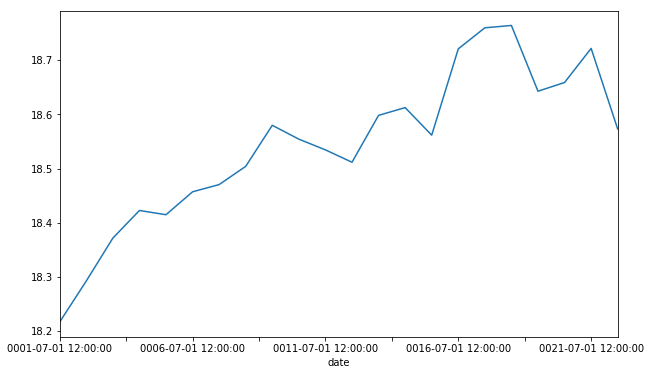

In [5]:
df.tosga.plot(figsize=(10,6))

#### More complex plot with error bars

Here, we regress ocean volume mean temperature vs sea surface temperature

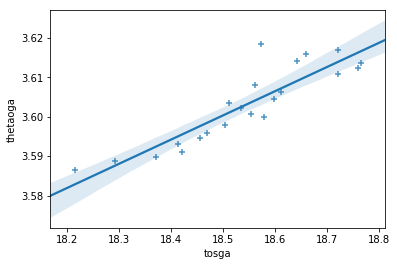

In [6]:
sns.regplot(x='tosga', y='thetaoga', marker="+", data=df)

##### Export variable to NumPy array

In [7]:
array = df.ssh_ga.to_numpy()
print(f'The shape of the array is {array.shape}')
print(f'The mean of the array is {array.mean()}')
print(f'The standard deviation of the array is {array.std()}')

The shape of the array is (22,)
The mean of the array is -0.16301918291157272
The standard deviation of the array is 0.022202487558102956


### Example Workflow to Plot SST (`thetao` at the surface)

In [10]:
# Get metadata about experiment 1433
metadata = doralite.dora_metadata(1433)

# Construct a path to a file containing thetao
filepath = metadata['pathPP']+'ocean_annual_z/ts/annual/10yr/ocean_annual_z.0001-0010.thetao.nc'
print(filepath)

# consider dmgetting the file first, otherwise load file as an xarray dataset
#ds = xr.open_dataset(filepath)

# plot sst
#ds.thetao(slice(lev=0)).plot()

/archive/Niki.Zadeh/xanadu_esm4_20190304_devgfdl_20200330/CM4_2010Control_C_noBLING_c192_OM4p125/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_annual_z/ts/annual/10yr/ocean_annual_z.0001-0010.thetao.nc
